# Imports

In [19]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import feather
import scipy.stats as stats

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Displaying Resolution
plt.rcParams['figure.dpi'] = 150
# Saveing Resolution
plt.rcParams['savefig.dpi'] = 300

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import sklearn. metrics
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn.metrics import accuracy_score
from sklearn. metrics import balanced_accuracy_score 
import sklearn. metrics
from sklearn import preprocessing 
from sklearn. model_selection import train_test_split 
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn. metrics import confusion_matrix 
#import graphviz

import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
images = []
labels = []

In [21]:
# Check is using GPU for tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#Print tens
print(tf.__version__)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18165650763592038473
xla_global_id: -1
]
Num GPUs Available:  0
2.8.0


In [2]:
def list_folders(directory):
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folders

In [3]:
def plot_loss_accuracy(history):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Data Import

In [4]:
folders_list_train = list_folders("Images")
#folders_list_test = list_folders("test")

In [5]:
for folder in folders_list_train:
        subdirect = ""
        subdirect = os.path.join("Images", folder)
        image_files = os.listdir(subdirect)
        for file in image_files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(subdirect, file)
                image = iio.v3.imread(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(folder)

In [6]:
images = np.array(images)
labels = np.array(labels)

In [7]:
labels = le.fit_transform(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

4


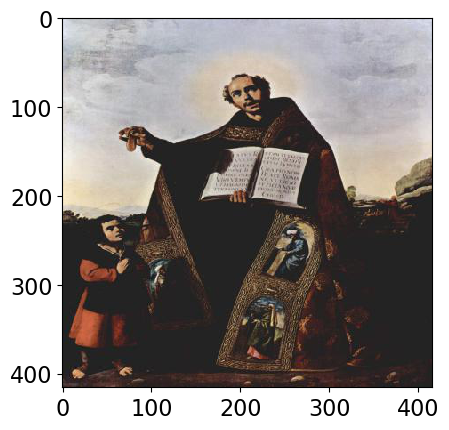

In [9]:
print(y_train[900])
plt.imshow(X_train[900], interpolation='nearest')
plt.show()

7


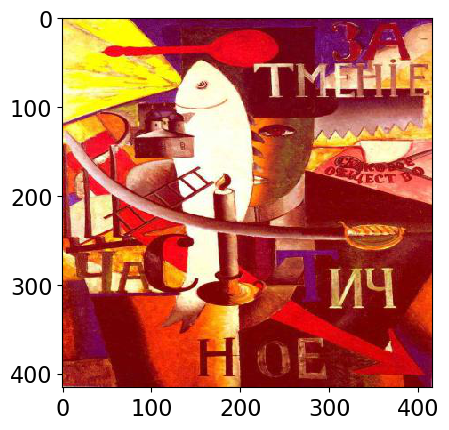

In [12]:
print(y_test[400])
plt.imshow(X_test[400], interpolation='nearest')
plt.show()

In [13]:
X_train[0]

array([[[195, 172, 166],
        [197, 174, 168],
        [199, 176, 170],
        ...,
        [194, 163, 143],
        [196, 165, 145],
        [197, 166, 146]],

       [[196, 173, 167],
        [197, 174, 168],
        [199, 176, 170],
        ...,
        [194, 163, 145],
        [195, 164, 144],
        [196, 165, 145]],

       [[196, 173, 167],
        [197, 174, 168],
        [199, 176, 170],
        ...,
        [194, 163, 145],
        [193, 162, 142],
        [193, 162, 142]],

       ...,

       [[151, 123, 101],
        [158, 130, 108],
        [163, 135, 113],
        ...,
        [ 65,  61,  60],
        [ 55,  54,  52],
        [ 77,  76,  74]],

       [[149, 121,  99],
        [159, 131, 109],
        [165, 137, 115],
        ...,
        [ 70,  66,  65],
        [ 58,  57,  55],
        [ 83,  82,  80]],

       [[148, 120,  98],
        [158, 130, 108],
        [165, 137, 115],
        ...,
        [ 70,  66,  65],
        [ 57,  53,  52],
        [ 80,  79,  77]]

In [14]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [15]:
y_train

array([24, 12, 21, ..., 21, 22,  4], dtype=int64)

In [16]:
y_test

array([15, 15, 23, ..., 24, 22, 26], dtype=int64)

In [20]:
#Print all labels
le.classes_


array(['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism',
       'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting',
       'Contemporary_Realism', 'Cubism', 'Early_Renaissance',
       'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism',
       'Mannerism_Late_Renaissance', 'Minimalism',
       'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance',
       'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism',
       'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism',
       'Ukiyo_e'], dtype='<U26')

c:\Users\adamonte\AppData\Local\anaconda3\envs\csc6621\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 519168)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    66,453,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,473,756 (253.58 MB)

 Trainable params: 66,473,756 (253.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 70s 915ms/step - accuracy: 0.0138 - loss: 7.0878 - val_accuracy: 0.0125 - val_loss: 6.9235
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 478ms/step - accuracy: 0.0222 - loss: 6.6907 - val_accuracy: 0.0125 - val_loss: 6.9235
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 454ms/step - accuracy: 0.0169 - loss: 6.7696 - val_accuracy: 0.0125 - val_loss: 6.9235
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 457ms/step - accuracy: 0.0183 - loss: 6.8319 - val_accuracy: 0.0125 - val_loss: 6.9235
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 471ms/step - accuracy: 0.0185 - loss: 6.9056 - val_accuracy: 0.0125 - val_loss: 6.9235


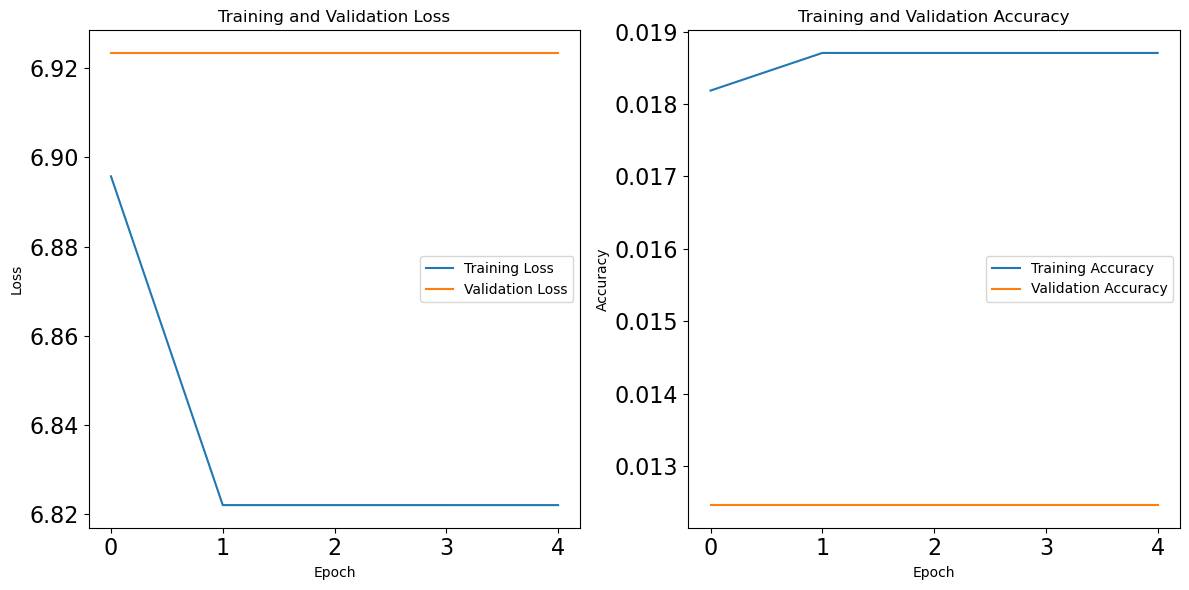

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.0176 - loss: 6.9355
DNN Model - Test Accuracy: 0.017445482313632965


In [17]:
# Define the DNN architecture
model_dnn = Sequential()
model_dnn.add(Flatten(input_shape=(416, 416, 3)))
model_dnn.add(Dense(128, activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(128, activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(28, activation='relu'))
#model_dnn.add(Dense(28, activation='relu'))

#model_dnn.add(Dense(28, activation='softmax'))

# Compile the DNN model
model_dnn.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_dnn.summary()

# Train the DNN model
history_dnn = model_dnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

plot_loss_accuracy(history_dnn)

# Evaluate the DNN model
loss_dnn, accuracy_dnn = model_dnn.evaluate(X_test, y_test)
print("DNN Model - Test Accuracy:", accuracy_dnn)

_______

In [18]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(416, 416, 3)))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(Flatten())

model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(32, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

plot_loss_accuracy(history_cnn)

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print("CNN Model - Test Accuracy:", accuracy_cnn)

c:\Users\adamonte\AppData\Local\anaconda3\envs\csc6621\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 414, 414, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 207, 207, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 205, 205, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 102, 102, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │    10,240,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,270,592 (39.18 MB)

 Trainable params: 10,270,592 (39.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0854 - loss: 3.7274

KeyboardInterrupt: 